In [65]:
import cudaq
import math

# Quantum Gates

In [66]:
@cudaq.kernel
def kernel():
    qubit = cudaq.qubit()

    h(qubit)

    mz(qubit)

result = cudaq.sample(kernel)
print(result)



{ 0:503 1:497 }



In [74]:
@cudaq.kernel
def kernel():
    qvector = cudaq.qvector(2)

    h(qvector[0])

    # controlled-not gate
    x.ctrl(qvector[0], qvector[1])

    # mz(qvector[0])
    # mz(qvector[1])

result = cudaq.sample(kernel)
print(result)

{ 00:504 11:496 }



# Bloch Sphere

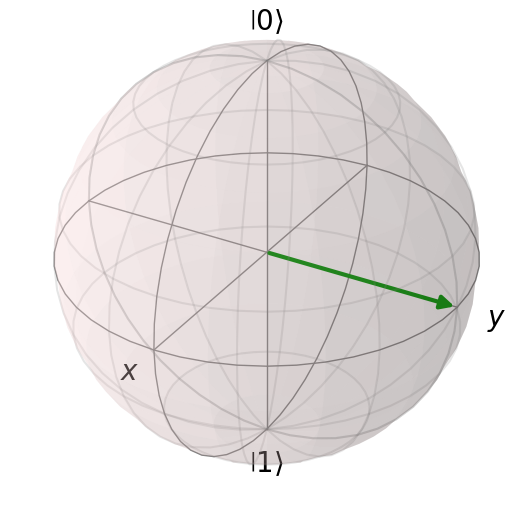

In [ ]:
@cudaq.kernel
def kernel():
    qb = cudaq.qubit()

    h(qb)
    s(qb)

    # rx(-math.pi*0.5, qb)

bloch = []
sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel))
cudaq.show(sph) 

# Circuit Visualization

In [63]:
@cudaq.kernel
def kernel_to_draw():
    q = cudaq.qvector(4)
    h(q)
    x.ctrl(q[0], q[1])
    y.ctrl([q[0], q[1]], q[2])
    z(q[2])

    swap(q[0], q[1])
    swap(q[0], q[3])
    swap(q[1], q[2])

    r1(3.14159, q[0])
    tdg(q[1])
    s(q[2])

print(cudaq.draw(kernel_to_draw))

     ╭───╮                  ╭───────────╮       
q0 : ┤ h ├──●────●────╳───╳─┤ r1(3.142) ├───────
     ├───┤╭─┴─╮  │    │   │ ╰───────────╯╭─────╮
q1 : ┤ h ├┤ x ├──●────╳───┼───────╳──────┤ tdg ├
     ├───┤╰───╯╭─┴─╮╭───╮ │       │      ╰┬───┬╯
q2 : ┤ h ├─────┤ y ├┤ z ├─┼───────╳───────┤ s ├─
     ├───┤     ╰───╯╰───╯ │               ╰───╯ 
q3 : ┤ h ├────────────────╳─────────────────────
     ╰───╯                                      



In [64]:
cudaq.spin.x(0)